# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

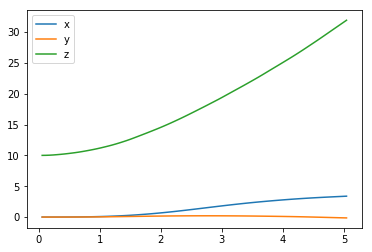

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

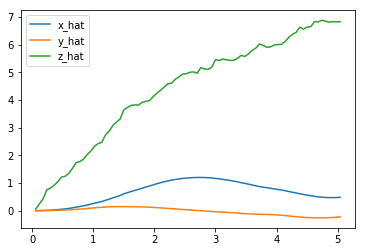

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

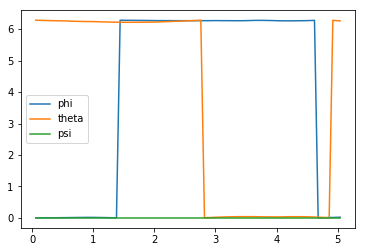

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

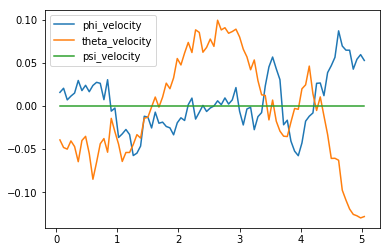

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

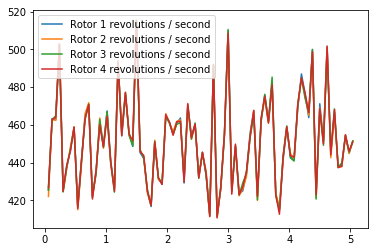

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  3.38621383e+00  -1.38405062e-01   3.19114814e+01   2.12458588e-02
   6.26356568e+00   0.00000000e+00]
[ 0.48282174 -0.22639883  6.83261534]
[ 0.05287835 -0.12829782  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  28.834 (best =  29.122), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
## TODO: Train your agent here. 
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task
from agents.agent import DDPG
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import csv

runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 15., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'result.csv'                         # file name for saved results
num_episodes = 1000
target_pos = np.array([0., 0., 90.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
agent = DDPG(task)
episode_results = {'episode_number':[],'total_reward':[], 'agent_score':[]}

for i_episode in range(1, num_episodes+1):
    time_start = datetime.datetime.now()
    state = agent.reset_episode() # start a new episode
    best_score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        row = [i_episode, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2], reward]
       
        with open('Records.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(row)

        csvFile.close()
        if done:
            time_end = datetime.datetime.now()
            time_diff = str(time_end - time_start)
#             print('Episode:::::::::::::::::::::::::::::::::')
            print("Episode = {:4d}, score = {:7.3f}, total_reward = {:7.3f}, count={:7.3f}, time_diff={}".format(
                i_episode,  agent.score, agent.total_reward, agent.count, time_diff))  # [debug]
            episode_results['episode_number'].append(i_episode)
            episode_results['total_reward'].append(agent.total_reward)
            episode_results['agent_score'].append(agent.score)
            break
    sys.stdout.flush()
# print(episode_results)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


Episode =    1, score =   0.000, total_reward = 651.003, count= 30.000, time_diff=0:00:00.065758
Episode =    2, score =   0.000, total_reward = 651.447, count= 30.000, time_diff=0:00:00.038924
Episode =    3, score =  21.610, total_reward = 734.740, count= 34.000, time_diff=0:00:00.827464
Episode =    4, score =  21.842, total_reward = 524.198, count= 24.000, time_diff=0:00:00.263232
Episode =    5, score =  23.170, total_reward = 1946.294, count= 84.000, time_diff=0:00:00.947053
Episode =    6, score =  22.947, total_reward = 1927.566, count= 84.000, time_diff=0:00:00.942626
Episode =    7, score =  23.801, total_reward = 1999.312, count= 84.000, time_diff=0:00:00.961965
Episode =    8, score =  21.897, total_reward = 700.689, count= 32.000, time_diff=0:00:00.372124
Episode =    9, score =  23.138, total_reward = 1943.591, count= 84.000, time_diff=0:00:00.990540
Episode =   10, score =  23.582, total_reward = 1674.318, count= 71.000, time_diff=0:00:00.803201
Episode =   11, score =  

Episode =   85, score =  21.395, total_reward = 1797.201, count= 84.000, time_diff=0:00:00.953878
Episode =   86, score =  22.844, total_reward = 1918.876, count= 84.000, time_diff=0:00:00.950522
Episode =   87, score =  23.183, total_reward = 1947.397, count= 84.000, time_diff=0:00:00.967255
Episode =   88, score =  22.863, total_reward = 1920.499, count= 84.000, time_diff=0:00:00.959356
Episode =   89, score =  23.236, total_reward = 1951.826, count= 84.000, time_diff=0:00:00.970002
Episode =   90, score =  21.757, total_reward = 522.178, count= 24.000, time_diff=0:00:00.280465
Episode =   91, score =  23.292, total_reward = 1956.509, count= 84.000, time_diff=0:00:00.962086
Episode =   92, score =  22.755, total_reward = 1911.436, count= 84.000, time_diff=0:00:00.945833
Episode =   93, score =  23.065, total_reward = 1937.496, count= 84.000, time_diff=0:00:00.965282
Episode =   94, score =  22.920, total_reward = 1925.278, count= 84.000, time_diff=0:00:00.957398
Episode =   95, score

Episode =  170, score =  21.632, total_reward = 757.133, count= 35.000, time_diff=0:00:00.399379
Episode =  171, score =  21.304, total_reward = 916.059, count= 43.000, time_diff=0:00:00.491700
Episode =  172, score =  21.586, total_reward = 647.587, count= 30.000, time_diff=0:00:00.341679
Episode =  173, score =  21.739, total_reward = 717.381, count= 33.000, time_diff=0:00:00.380885
Episode =  174, score =  21.605, total_reward = 669.748, count= 31.000, time_diff=0:00:00.358068
Episode =  175, score =  21.516, total_reward = 580.919, count= 27.000, time_diff=0:00:00.330711
Episode =  176, score =  21.654, total_reward = 671.279, count= 31.000, time_diff=0:00:00.364120
Episode =  177, score =  21.663, total_reward = 779.872, count= 36.000, time_diff=0:00:00.412848
Episode =  178, score =  21.403, total_reward = 706.287, count= 33.000, time_diff=0:00:00.378098
Episode =  179, score =  21.608, total_reward = 821.098, count= 38.000, time_diff=0:00:00.431889
Episode =  180, score =  21.57

Episode =  255, score =  21.886, total_reward = 853.564, count= 39.000, time_diff=0:00:00.441158
Episode =  256, score =  21.491, total_reward = 709.187, count= 33.000, time_diff=0:00:00.376082
Episode =  257, score =  21.773, total_reward = 653.179, count= 30.000, time_diff=0:00:00.341461
Episode =  258, score =  23.061, total_reward = 1937.151, count= 84.000, time_diff=0:00:00.948334
Episode =  259, score =  22.425, total_reward = 1883.724, count= 84.000, time_diff=0:00:00.949947
Episode =  260, score =  20.344, total_reward = 1464.790, count= 72.000, time_diff=0:00:00.812788
Episode =  261, score =  23.032, total_reward = 1934.664, count= 84.000, time_diff=0:00:00.957223
Episode =  262, score =  21.720, total_reward = 716.766, count= 33.000, time_diff=0:00:00.384299
Episode =  263, score =  21.473, total_reward = 536.829, count= 25.000, time_diff=0:00:00.281097
Episode =  264, score =  21.513, total_reward = 731.433, count= 34.000, time_diff=0:00:00.386767
Episode =  265, score =  2

Episode =  340, score =  21.444, total_reward = 879.198, count= 41.000, time_diff=0:00:00.522995
Episode =  341, score =  19.700, total_reward = 1654.777, count= 84.000, time_diff=0:00:01.069062
Episode =  342, score =  21.621, total_reward = 627.005, count= 29.000, time_diff=0:00:00.368448
Episode =  343, score =  21.723, total_reward = 564.803, count= 26.000, time_diff=0:00:00.328179
Episode =  344, score =  21.039, total_reward = 946.756, count= 45.000, time_diff=0:00:00.568113
Episode =  345, score =  21.618, total_reward = 626.931, count= 29.000, time_diff=0:00:00.375724
Episode =  346, score =  21.633, total_reward = 648.988, count= 30.000, time_diff=0:00:00.400303
Episode =  347, score =  21.603, total_reward = 604.879, count= 28.000, time_diff=0:00:00.364401
Episode =  348, score =  21.417, total_reward = 749.606, count= 35.000, time_diff=0:00:00.451156
Episode =  349, score =  21.670, total_reward = 563.422, count= 26.000, time_diff=0:00:00.330269
Episode =  350, score =  21.4

Episode =  425, score =  21.438, total_reward = 686.003, count= 32.000, time_diff=0:00:00.362364
Episode =  426, score =  21.589, total_reward = 777.220, count= 36.000, time_diff=0:00:00.408688
Episode =  427, score =  21.442, total_reward = 750.466, count= 35.000, time_diff=0:00:00.392140
Episode =  428, score =  21.375, total_reward = 748.141, count= 35.000, time_diff=0:00:00.392786
Episode =  429, score =  21.074, total_reward = 716.524, count= 34.000, time_diff=0:00:00.387702
Episode =  430, score =  21.591, total_reward = 755.676, count= 35.000, time_diff=0:00:00.396085
Episode =  431, score =  22.183, total_reward = 754.217, count= 34.000, time_diff=0:00:00.399425
Episode =  432, score =  21.820, total_reward = 720.067, count= 33.000, time_diff=0:00:00.379840
Episode =  433, score =  21.778, total_reward = 827.574, count= 38.000, time_diff=0:00:00.450529
Episode =  434, score =  21.698, total_reward = 672.624, count= 31.000, time_diff=0:00:00.357274
Episode =  435, score =  22.18

Episode =  510, score =  21.541, total_reward = 775.467, count= 36.000, time_diff=0:00:00.415308
Episode =  511, score =  22.300, total_reward = 1873.171, count= 84.000, time_diff=0:00:00.975819
Episode =  512, score =  21.375, total_reward = 598.512, count= 28.000, time_diff=0:00:00.324907
Episode =  513, score =  22.516, total_reward = 765.540, count= 34.000, time_diff=0:00:00.381604
Episode =  514, score =  22.351, total_reward = 1251.670, count= 56.000, time_diff=0:00:00.633502
Episode =  515, score =  22.198, total_reward = 1043.312, count= 47.000, time_diff=0:00:00.549694
Episode =  516, score =  21.164, total_reward = 571.424, count= 27.000, time_diff=0:00:00.334914
Episode =  517, score =  21.732, total_reward = 869.293, count= 40.000, time_diff=0:00:00.493629
Episode =  518, score =  24.895, total_reward = 2091.183, count= 84.000, time_diff=0:00:01.063992
Episode =  519, score =  21.865, total_reward = 1639.842, count= 75.000, time_diff=0:00:00.965879
Episode =  520, score =  

Episode =  595, score =  23.447, total_reward = 1664.715, count= 71.000, time_diff=0:00:00.841439
Episode =  596, score =  22.359, total_reward = 693.120, count= 31.000, time_diff=0:00:00.360602
Episode =  597, score =  23.473, total_reward = 1525.738, count= 65.000, time_diff=0:00:00.757953
Episode =  598, score =  21.014, total_reward = 546.369, count= 26.000, time_diff=0:00:00.302881
Episode =  599, score =  20.985, total_reward = 1406.015, count= 67.000, time_diff=0:00:00.786164
Episode =  600, score =  22.172, total_reward = 687.334, count= 31.000, time_diff=0:00:00.363699
Episode =  601, score =  22.298, total_reward = 1070.303, count= 48.000, time_diff=0:00:00.565966
Episode =  602, score =  21.968, total_reward = 702.969, count= 32.000, time_diff=0:00:00.365089
Episode =  603, score =  22.014, total_reward = 704.457, count= 32.000, time_diff=0:00:00.370113
Episode =  604, score =  22.156, total_reward = 686.847, count= 31.000, time_diff=0:00:00.361368
Episode =  605, score =  2

Episode =  680, score =  21.926, total_reward = 789.327, count= 36.000, time_diff=0:00:00.419316
Episode =  681, score =  22.316, total_reward = 1294.334, count= 58.000, time_diff=0:00:00.672195
Episode =  682, score =  21.510, total_reward = 838.892, count= 39.000, time_diff=0:00:00.452020
Episode =  683, score =  21.424, total_reward = 664.133, count= 31.000, time_diff=0:00:00.354496
Episode =  684, score =  21.837, total_reward = 633.273, count= 29.000, time_diff=0:00:00.334958
Episode =  685, score =  21.342, total_reward = 746.986, count= 35.000, time_diff=0:00:00.397700
Episode =  686, score =  21.409, total_reward = 685.081, count= 32.000, time_diff=0:00:00.384657
Episode =  687, score =  21.486, total_reward = 751.996, count= 35.000, time_diff=0:00:00.409038
Episode =  688, score =  21.350, total_reward = 640.505, count= 30.000, time_diff=0:00:00.341754
Episode =  689, score =  22.242, total_reward = 733.997, count= 33.000, time_diff=0:00:00.391960
Episode =  690, score =  21.4

Episode =  765, score =  21.376, total_reward = 748.156, count= 35.000, time_diff=0:00:00.413733
Episode =  766, score =  21.502, total_reward = 946.087, count= 44.000, time_diff=0:00:00.501076
Episode =  767, score =  21.929, total_reward = 701.739, count= 32.000, time_diff=0:00:00.372386
Episode =  768, score =  21.894, total_reward = 547.344, count= 25.000, time_diff=0:00:00.289940
Episode =  769, score =  21.745, total_reward = 565.370, count= 26.000, time_diff=0:00:00.294034
Episode =  770, score =  21.362, total_reward = 747.662, count= 35.000, time_diff=0:00:00.399190
Episode =  771, score =  21.339, total_reward = 746.874, count= 35.000, time_diff=0:00:00.396457
Episode =  772, score =  21.391, total_reward = 748.674, count= 35.000, time_diff=0:00:00.397899
Episode =  773, score =  21.728, total_reward = 738.760, count= 34.000, time_diff=0:00:00.395106
Episode =  774, score =  21.356, total_reward = 640.672, count= 30.000, time_diff=0:00:00.345342
Episode =  775, score =  22.05

Episode =  850, score =  21.017, total_reward = 819.666, count= 39.000, time_diff=0:00:00.456800
Episode =  851, score =  21.576, total_reward = 798.297, count= 37.000, time_diff=0:00:00.424496
Episode =  852, score =  21.022, total_reward = 966.991, count= 46.000, time_diff=0:00:00.520814
Episode =  853, score =  24.918, total_reward = 2093.093, count= 84.000, time_diff=0:00:00.956184
Episode =  854, score =  21.084, total_reward = 822.263, count= 39.000, time_diff=0:00:00.444055
Episode =  855, score =  23.521, total_reward = 1975.782, count= 84.000, time_diff=0:00:00.961255
Episode =  856, score =  24.924, total_reward = 1769.613, count= 71.000, time_diff=0:00:00.796647
Episode =  857, score =  22.618, total_reward = 565.443, count= 25.000, time_diff=0:00:00.287945
Episode =  858, score =  21.454, total_reward = 707.988, count= 33.000, time_diff=0:00:00.375218
Episode =  859, score =  21.448, total_reward = 772.125, count= 36.000, time_diff=0:00:00.408279
Episode =  860, score =  21

Episode =  935, score =  20.350, total_reward = 1098.891, count= 54.000, time_diff=0:00:00.636012
Episode =  936, score =  24.593, total_reward = 2065.833, count= 84.000, time_diff=0:00:00.947460
Episode =  937, score =  21.993, total_reward = 989.688, count= 45.000, time_diff=0:00:00.536331
Episode =  938, score =  24.230, total_reward = 2035.339, count= 84.000, time_diff=0:00:01.006270
Episode =  939, score =  21.811, total_reward = 1155.959, count= 53.000, time_diff=0:00:00.598572
Episode =  940, score =  22.019, total_reward = 1717.475, count= 78.000, time_diff=0:00:00.983284
Episode =  941, score =  25.248, total_reward = 2120.847, count= 84.000, time_diff=0:00:01.031538
Episode =  942, score =  21.986, total_reward = 879.451, count= 40.000, time_diff=0:00:00.485145
Episode =  943, score =  22.135, total_reward = 1350.234, count= 61.000, time_diff=0:00:00.720325
Episode =  944, score =  21.799, total_reward = 697.555, count= 32.000, time_diff=0:00:00.358592
Episode =  945, score =

In [12]:
print(episode_results)

{'episode_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

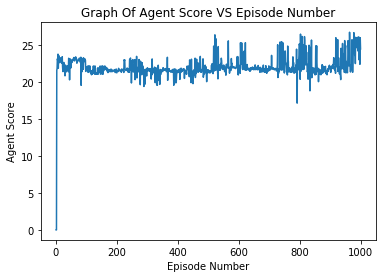

In [14]:
## TODO: Plot the rewards.
plt.plot(episode_results['episode_number'], episode_results['agent_score'])
plt.xlabel('Episode Number')
plt.ylabel('Agent Score')
plt.title('Graph Of Agent Score VS Episode Number')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I worked on is the **take-off** task . Our goal was to take the quadcopter from Initial Position [0., 0., 15.] to [0., 0., 90.] .     

My reward function works on following logic :- 

- Penalty For Deviating Its position from target position in X, Y, Z Dimension . 
        dist_penalty = abs((self.sim.pose[:3] - self.target_pos).sum())
- Penalty For Deviating Its Position from target position in terms of Euler Angles . 
        angular_penalty = abs((self.sim.pose[3:]).sum())
- Reward For Staying Up and Not Crashing At a time step . 
        reward = 10

- **Overall reward points = 10 for staying up and not crashing - (0.03 * dist_penalty + 0.06 * angular_penalty)**

This is what my final reward function looks like . 

        reward_points = 10.0 - (0.03 * dist_penalty + 0.06 * angular_penalty )
        

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- I have used Deep Deterministic Policy Gradients (DDPG) for the take-off task . I came to the conclusion of choosing this algorithm for the task because our problem statement has continuous action space and DDPG works best in continuous action space . Also the insights from Google Deep Mind research paper on 'continuous learning of deep reinforcement learning' (https://arxiv.org/pdf/1509.02971.pdf) proved the successful results of using DDPG in quadcopter scenarios both in simulations and real world convinced me to give it a try . Also the suggestions from instructors notes clearly indicated that DDPG is the best approach to go forward with . To start off the task, I used the same starter code . I also tried changing the architecture of neural network in both actor and critic , I tried adding more layer but my results stayed the same , so I concluded tweaking the architecture was not helping me . 



- I also tried tweaking the hyperparameters but did not observe any major difference with reward function so left the hyper parameters as default . 
- gamma = 0.99
- tau = 0.01
- exploration_mu = 0
- exploration_theta = 0.15
- exploration_sigma = 0.2



- **As I have already mentioned that I used default neural network architecture as was suggested in the starter code in the instructor notes. Here are the details about my architecture .**

- **The Actor Neural Network Architecture :-** 

We have used 3 dense hidden layers of units 32 - 64 - 32 with relu activation, a final layer with sigmoid activation . 

- **The Critic Neural Network Architecture :-**

We have two hidden layers initially of 32 units one of which take state space as input(denoting by L1) and other takes action space as input(denoting by L2) . The output from layer 'L1' is then fed into  another hidden layer(denoting by L3) of  64 units and the output from L2 is also fed into another hidden layer(denoting by L4) of 64 units .  The output from L3 and L4 are added to combine action and state pathways . We have used Relu activation function and adam optimiser in this architecture . 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- It was very difficult task to learn to teach a quadcopter how to fly . The major challenge was because the action space was very continuous and this gives agent ample of opportunities to try out more and more experiments and explore what is unknown to it . Also the state space being 6 dimensional, it turned more challenging . Also designing the reward function was pretty challenging . 

- I would say that I observed gradual learning curve , I can conclude so because if we observe the graph for Average Score of Agent Per Episode Versus episode number , we can observe the reward score is improved gradually , though we can see it oscillating but it gradually getting better and better and also I have saved all the times along with episode numbers in the CSV file named 'records.csv' and by observing the records here I can conclude the agent was getting better and better in terms of target episodes as it traversed more episodes, thus a gradual learning curve is observed . I would not say this is the most perfect score we can achieve because the agent score depends on lot of factors so I would rather say, this was the best I could achieve . 

- The final performance of the agent was really good as it has traversed uptil target position in the Z- direction and has also controlled its deviation in X-direction and Y-direction . The mean reward for the last 10 episodes is 24.49 . Also I believe if we would have trained for even larger episodes it would have improved more .

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Completing this project was truely challenging, there was not just one difficult or hardest point but I would say reaching uptil conclusion needed lot of patience . 
1. Initially the content of reinforcement learning was new and difficult to grasp in one go . It need replaying the videos again and again, reading blog posts and research papers etc. to get familiarity with the concepts of reinforcement . 

2. Then starting the project was difficult but I worked on open gym taxi v2 task in the practice project which increased my understanding of the reinforcement learning problem and how we can solve it\. 

3. Then I got to work upon understanding on the physics behind quadcopter and about its architecture and when its rotates clockwise and when anticlockwise .How net force of all the four rotors should be greater than the weight of the quadcopter to take off . Also the got to understand the meaning of these terms like roll, pitching, yawing etc . This gave me some background to design the reward function . 

4. Then followed instructor noted to start the project . 

5. then reward function is what got most challenging for me , it was also a game of patience to tweak network architecture and observe changes also tuning the reward function which teaches the agent the maximum was learning . Also trying different reward function to teach agent the maximum and making observations out of each attempt was good . I tried various different reward functions using different function like np.exp, sigmoid, np.tanh etc. Afterall this step taught me the most . 

